Акулова Анастасия Алексеевна ИУ5-65Б, Вариант 1

In [76]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")

Исследование датасета по ирисам

In [77]:
iris = load_iris()

Тип датасета

In [78]:
type(iris)

sklearn.utils._bunch.Bunch

Ключи датасета

In [79]:
for item in iris:
    print(item)

data
target
frame
target_names
DESCR
feature_names
filename
data_module


Создаем датафрэйм

In [80]:
def make_dataframe(get_dataset):
    ds = get_dataset()
    return pd.DataFrame(data = np.c_[ds['data'], ds['target']], columns = list(ds['feature_names']) + ['target'])

In [81]:
df = make_dataframe(load_iris)

In [82]:
df['target'].unique()

array([0., 1., 2.])

In [83]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Информация о корреляции признаков

In [84]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


<Axes: >

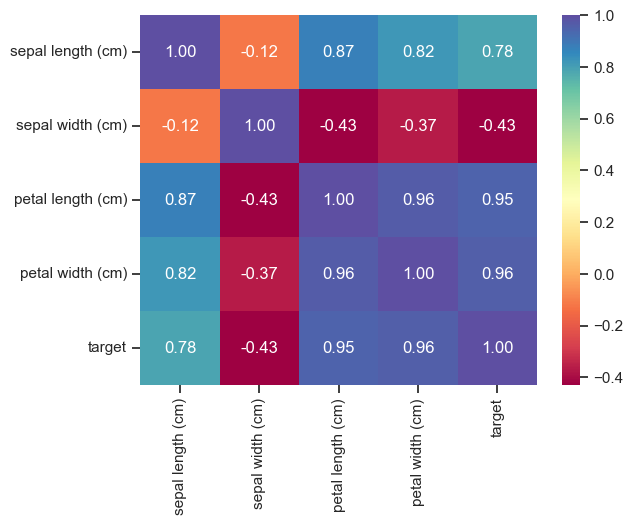

In [86]:
cmap = sns.color_palette("Spectral", as_cmap=True)
fig, ax = plt.subplots()
sns.heatmap(df.corr(method='pearson'), cmap=cmap, ax=ax, annot=True, fmt='.2f')

Целевой признак показывает высокую корреляцию с petal length и petal width, также присутствует корреляция с остальными признаками. Значит, модель построить возможно. При этом признаки, обладающие высокой корреляцией с целевым, также сильно связаны между собой, поэтому, возможно, следует исключить один из них.

# Парная диаграмма

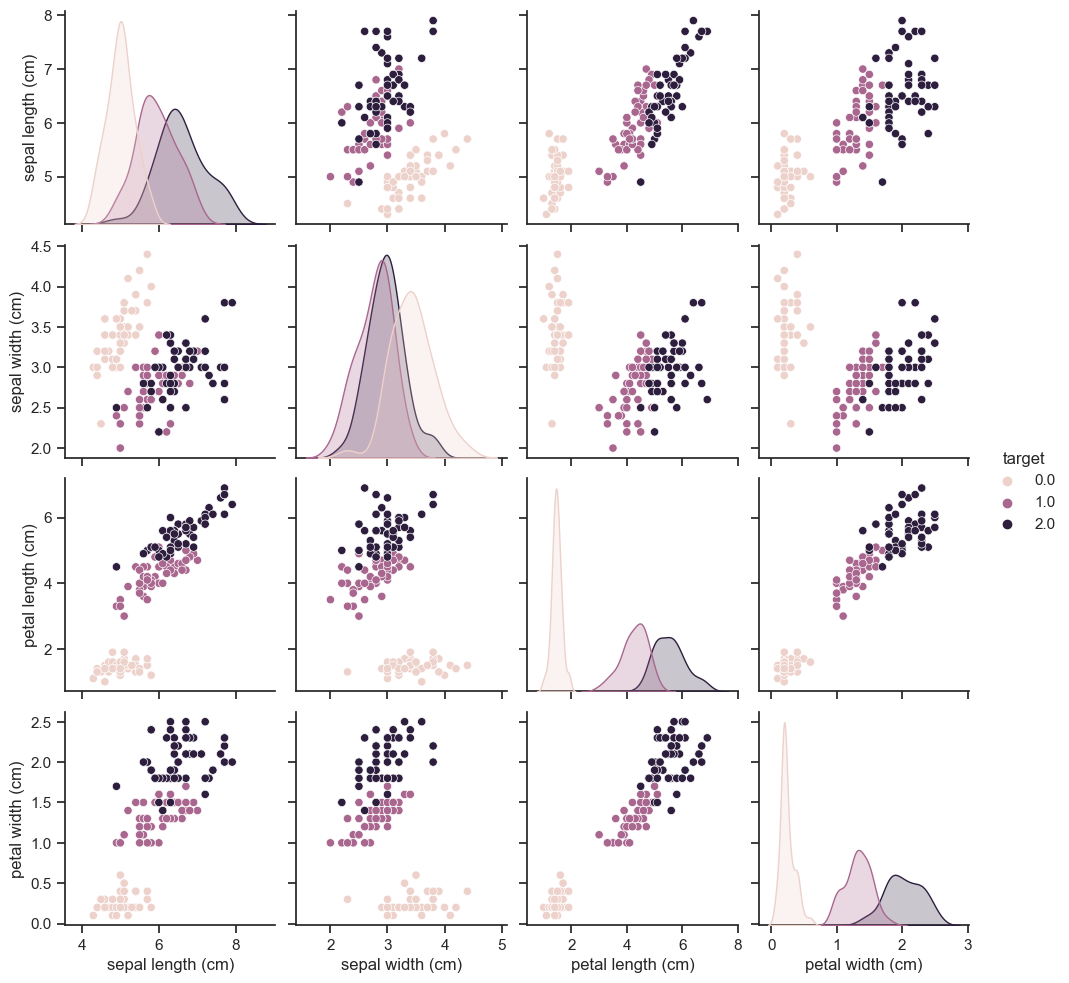

In [89]:
sns.pairplot(df, hue="target")

Парная диаграмма позволила нам лучше увидеть зависимость целевого признако от всех полей, разделив на 3 возможных уникальных значения, в дальнейшем будет удобнее строить графики.